In [1]:
#compare dist to meadow between strom events and usual dynamics
#mean values nov-jan
#ero dep
import numpy as np
import matplotlib.pyplot as plt
import h5py
from matplotlib import rcParams
rcParams['figure.dpi'] = 300
import pandas as pd
import os

In [2]:
h5pypat = '/work/gg0877/g260204/data/pickle_files/'
pname = 'srm203536'
plotpat = '/work/gg0877/g260204/sim_data/SR5yr/plots/plots/'+pname+'/'

runs = ['varsg','statsg','nosg']

if not os.path.exists(plotpat):
    os.makedirs(plotpat)

bins = np.linspace(-400,400,9)

df_storm = pd.DataFrame()
with h5py.File(h5pypat + pname+'_storms_ero_dep_disttomeadow.hdf5', 'r') as h5f:
    for k in h5f.keys():
        df_storm[k] = h5f[k][:]

ssc_storm = pd.DataFrame()
with h5py.File(h5pypat + pname+'_storms_sussed_disttomeadow.hdf5', 'r') as h5f:
    for k in h5f.keys():
        ssc_storm[k] = h5f[k][:]

df_mon = pd.DataFrame()
with h5py.File(h5pypat + pname+'_ero_dep_disttomeadow_1.hdf5', 'r') as h5f:
    for k in h5f.keys():
        df_mon[k] = h5f[k][:]
with h5py.File(h5pypat + pname+'_ero_dep_disttomeadow_11.hdf5', 'r') as h5f:
    for k in h5f.keys():
        df_mon[k] += h5f[k][:]
with h5py.File(h5pypat + pname+'_ero_dep_disttomeadow_12.hdf5', 'r') as h5f:
    for k in h5f.keys():
        df_mon[k] += h5f[k][:]
        df_mon[k] /= 3

ssc_mon = pd.DataFrame()
with h5py.File(h5pypat + pname+'_sussed_disttomeadow_1.hdf5', 'r') as h5f:
    for k in h5f.keys():
        ssc_mon[k] = h5f[k][:]
with h5py.File(h5pypat + pname+'_sussed_disttomeadow_11.hdf5', 'r') as h5f:
    for k in h5f.keys():
        ssc_mon[k] += h5f[k][:]
with h5py.File(h5pypat + pname+'_sussed_disttomeadow_12.hdf5', 'r') as h5f:
    for k in h5f.keys():
        ssc_mon[k] += h5f[k][:]
        ssc_mon[k] /= 3
    print(h5f.keys())

<KeysViewHDF5 ['nosg', 'statsg', 'varsg']>


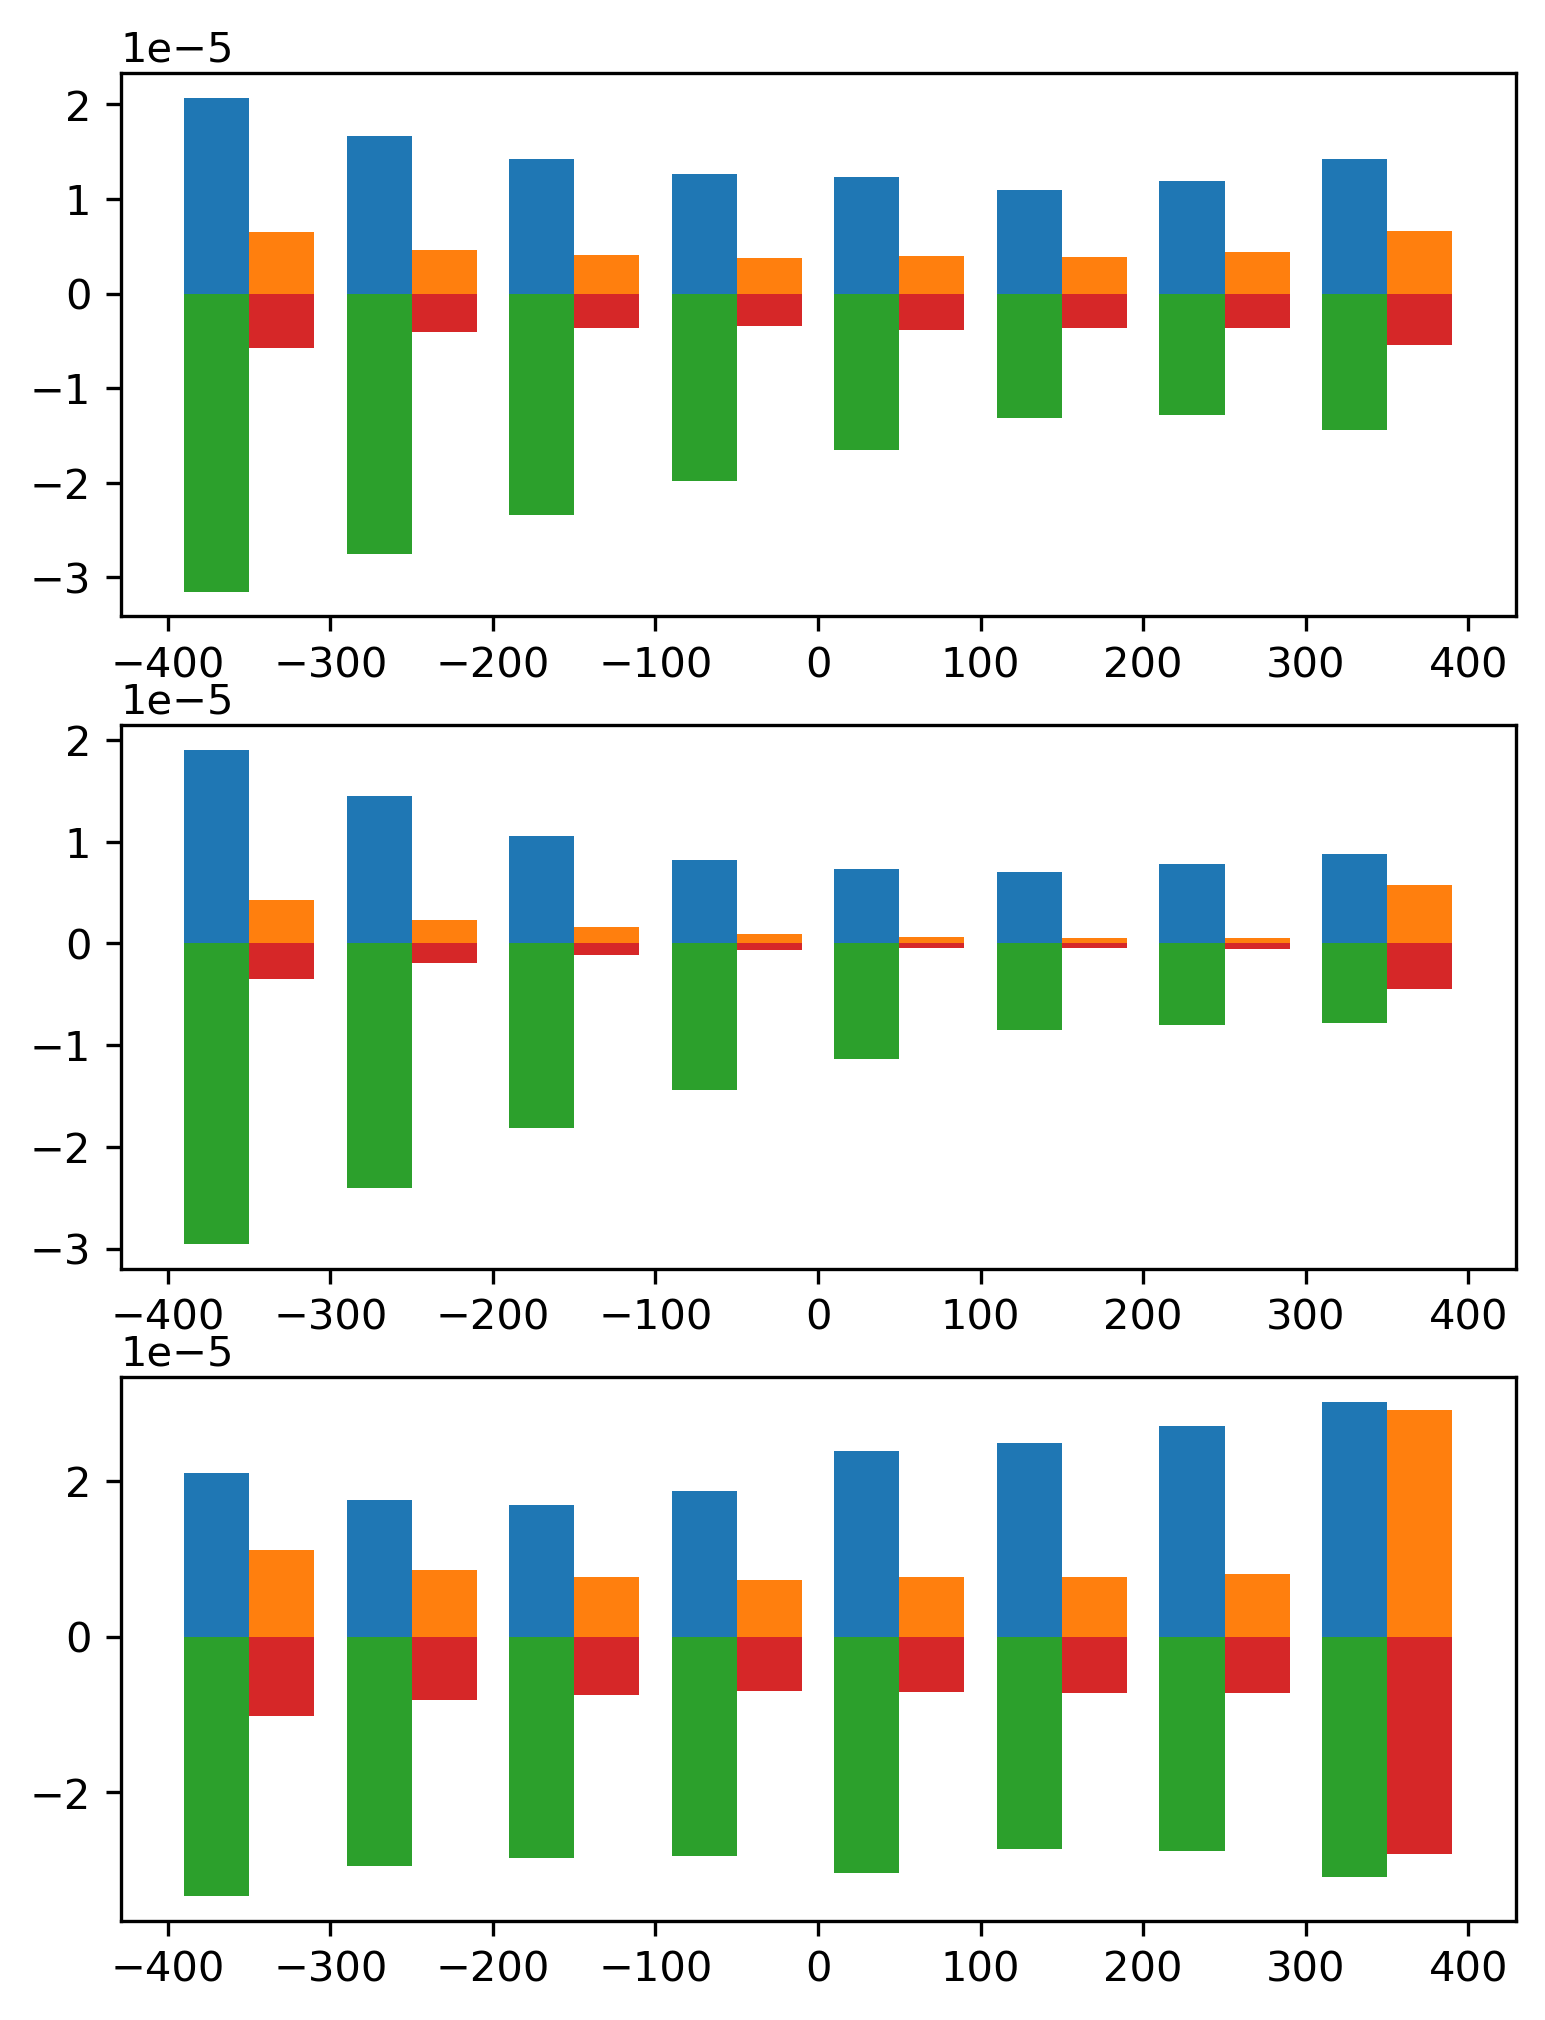

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))  # 3 rows, 1 column
width = 40
for i in range(3):
    axs[i].bar(bins[:-1] + (np.diff(bins)-width)/2 ,df_storm[runs[i]+'_ero'],label = 'ero',width=width)
    axs[i].bar(bins[:-1] + (np.diff(bins)+width)/2 ,df_mon[runs[i]+'_ero'],label = 'ero',width=width)
    axs[i].bar(bins[:-1] + (np.diff(bins)-width)/2 ,df_storm[runs[i]+'_dep'],label = 'ero',width=width)
    axs[i].bar(bins[:-1] + (np.diff(bins)+width)/2 ,df_mon[runs[i]+'_dep'],label = 'ero',width=width)

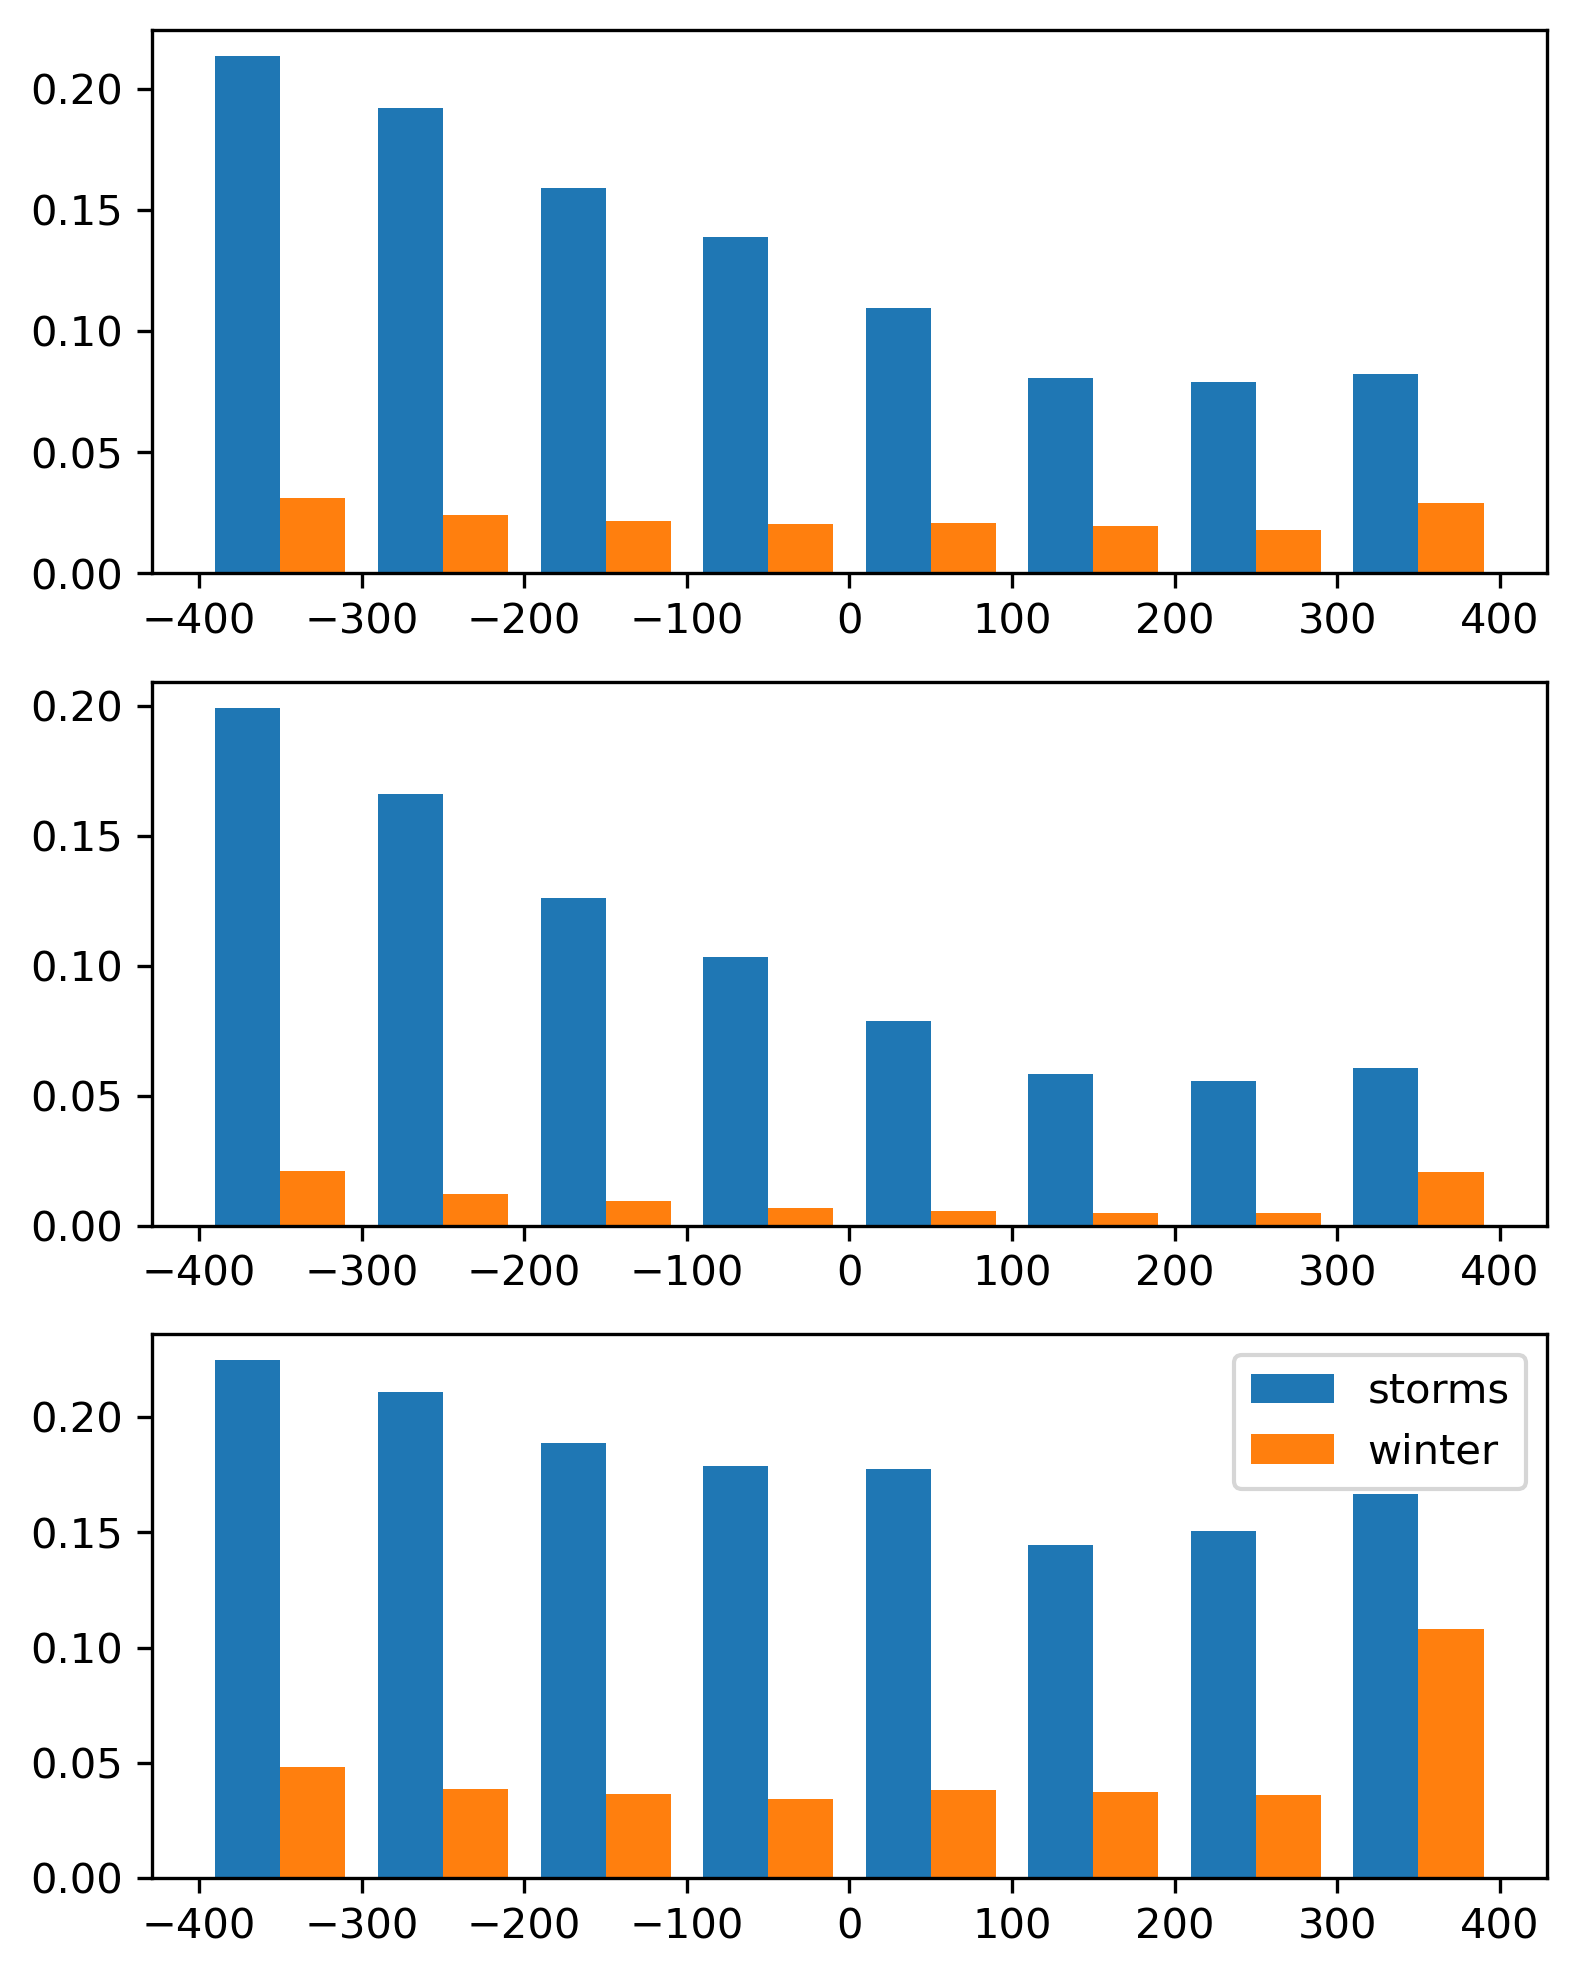

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))  # 3 rows, 1 column
width = 40
for i in range(3):
    axs[i].bar(bins[:-1] + (np.diff(bins)-width)/2 ,ssc_storm[runs[i]],label = 'storms',width=width)
    axs[i].bar(bins[:-1] + (np.diff(bins)+width)/2 ,ssc_mon[runs[i]],label = 'winter',width=width)
plt.legend()

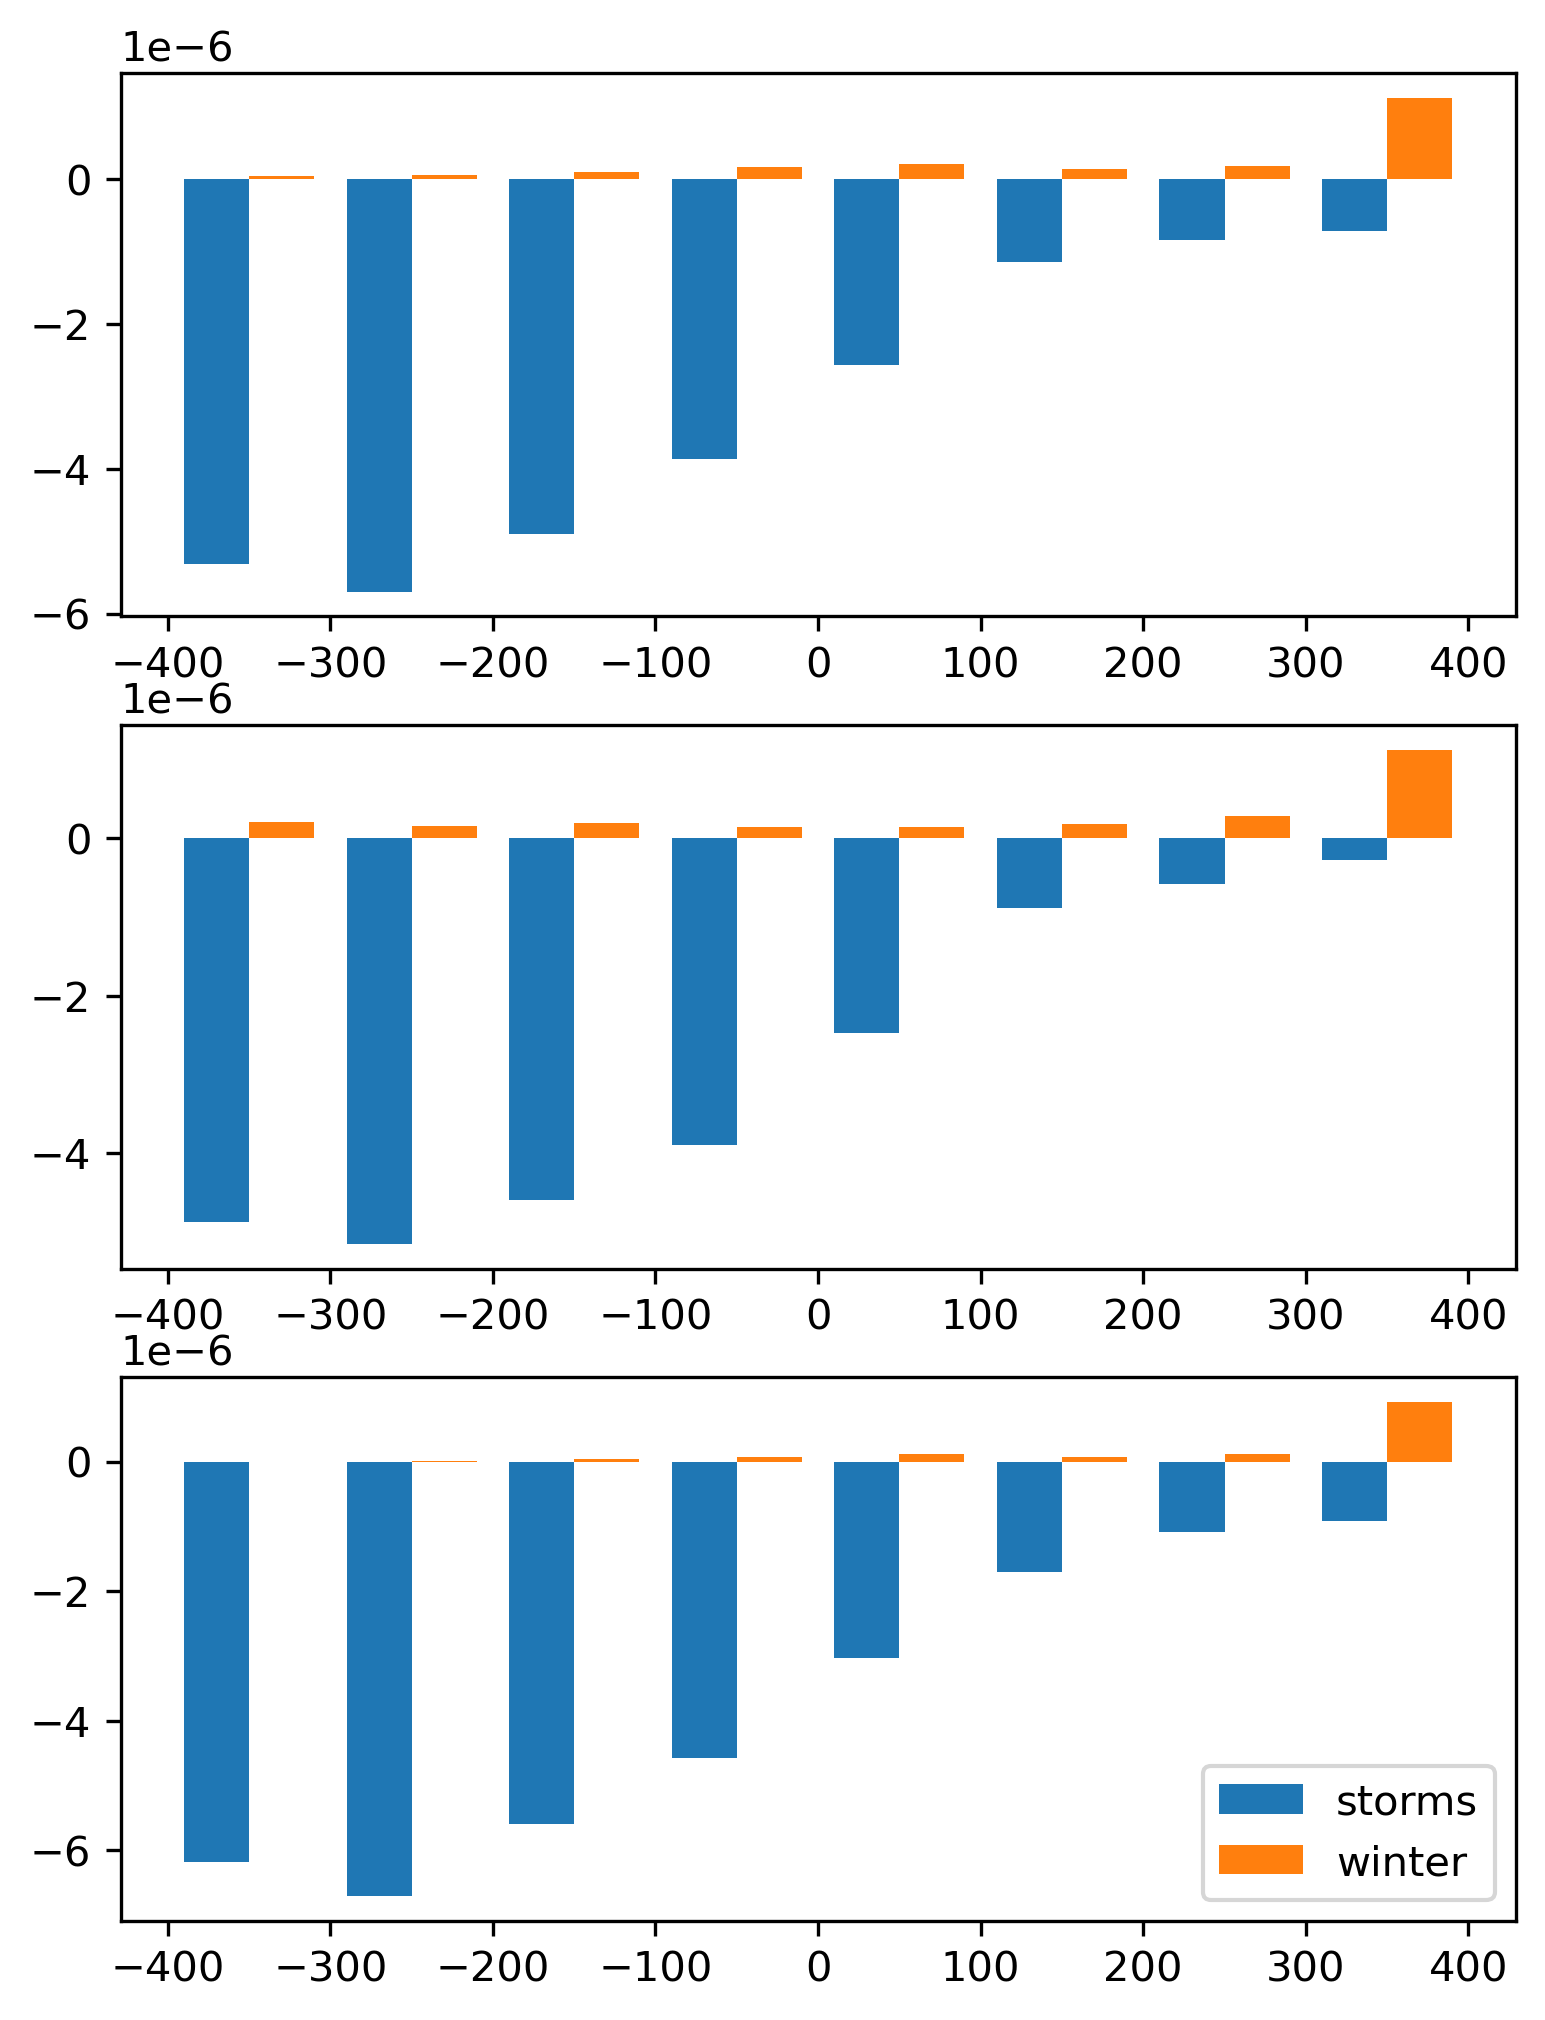

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))  # 3 rows, 1 column
width = 40
for i in range(3):
    axs[i].bar(bins[:-1] + (np.diff(bins)-width)/2 ,df_storm[runs[i]+'_diff'],label = 'storms',width=width)
    axs[i].bar(bins[:-1] + (np.diff(bins)+width)/2 ,df_mon[runs[i]+'_diff'],label = 'winter',width=width)
plt.legend()

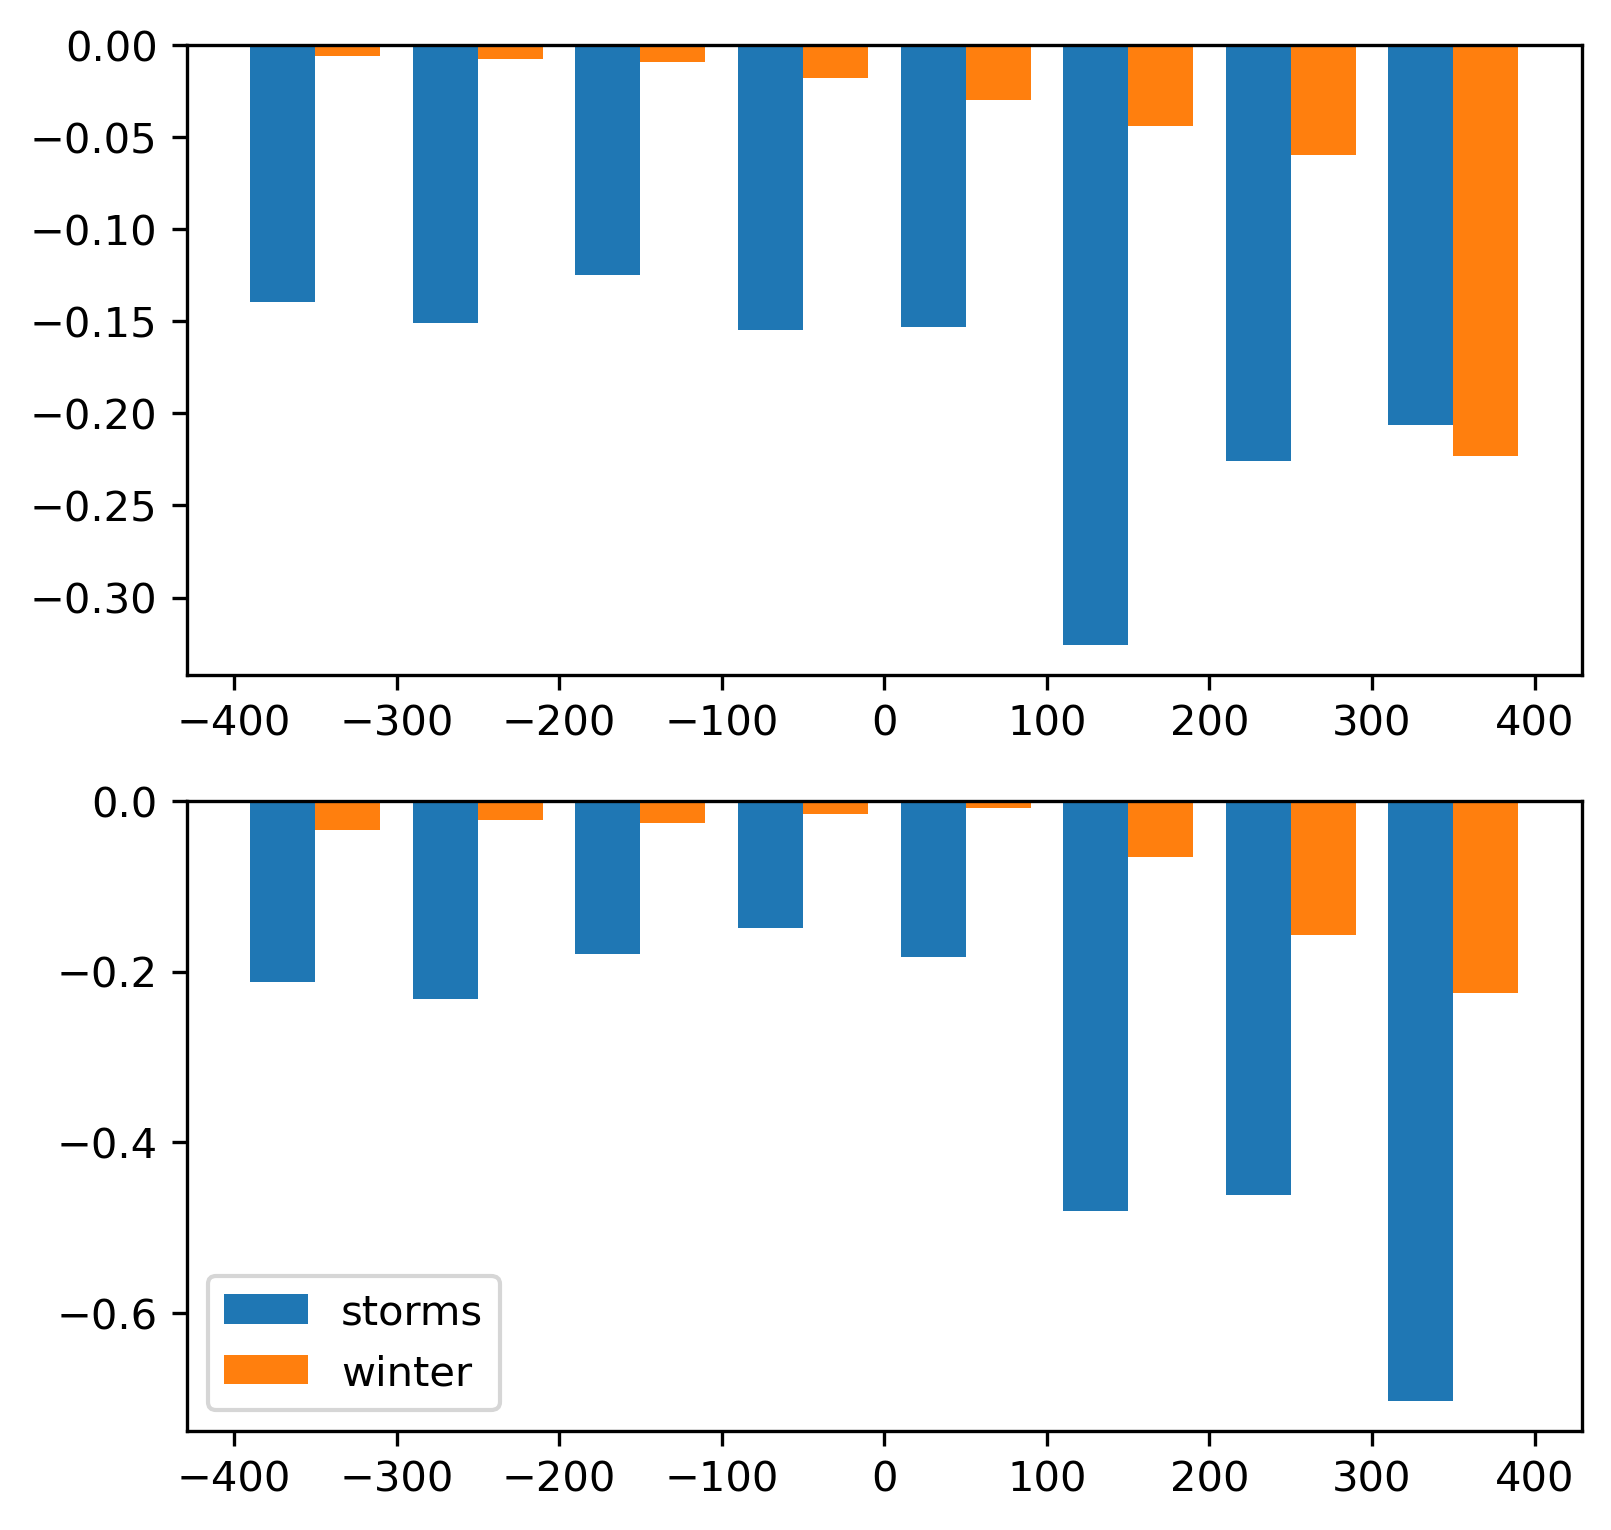

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(6,6))  # 3 rows, 1 column
width = 40
for i in range(2):
    axs[i].bar(bins[:-1] + (np.diff(bins)-width)/2 ,(df_storm[runs[i]+'_diff']-df_storm[runs[2]+'_diff'])/df_storm[runs[2]+'_diff'],label = 'storms',width=width)
    axs[i].bar(bins[:-1] + (np.diff(bins)+width)/2 ,(df_mon[runs[i]+'_diff']-df_mon[runs[2]+'_diff'])/df_storm[runs[2]+'_diff'],label = 'winter',width=width)
plt.legend()

0   -35.196268
1   -37.770968
2   -40.966589
3   -40.066808
4   -44.846807
5   -47.303703
6   -50.258197
7   -73.264873
dtype: float64
0    -4.844343
1    -8.786844
2   -15.643802
3   -22.267377
4   -38.224959
5   -44.352989
6   -47.618341
7   -50.546113
dtype: float64
0   -56.636322
1   -68.208162
2   -74.121080
3   -80.508859
4   -85.130234
5   -86.768910
6   -86.133299
7   -80.991398
dtype: float64
0   -11.351373
1   -21.164681
2   -33.237691
3   -42.266305
4   -55.663938
5   -59.786204
6   -63.118936
7   -63.713787
dtype: float64


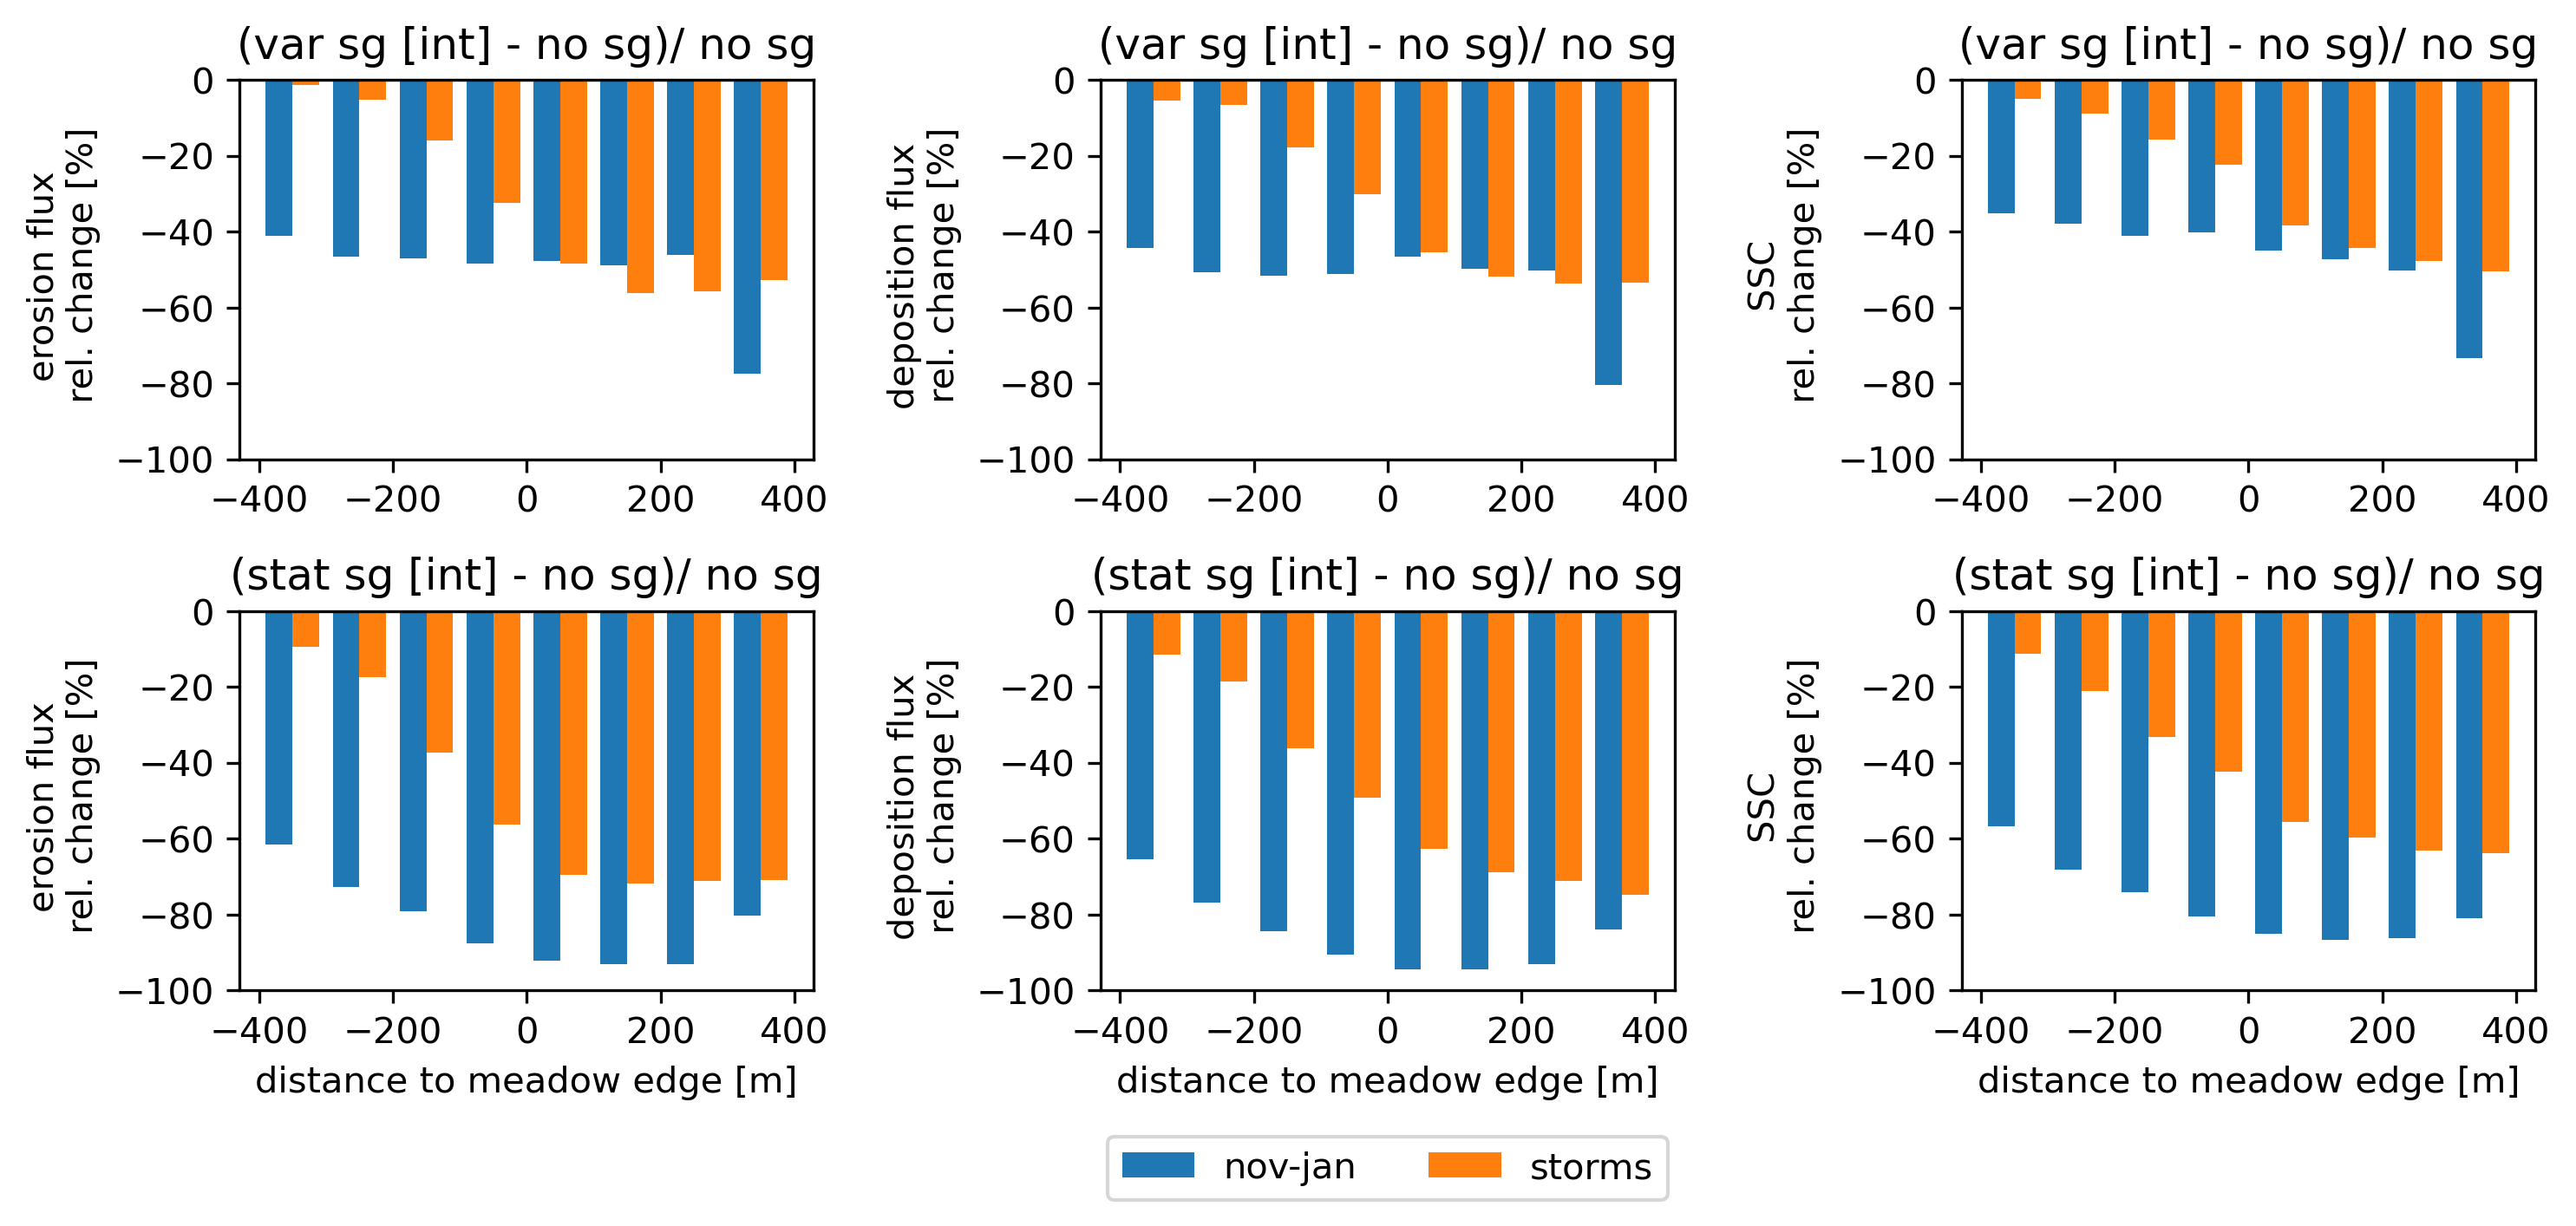

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))  # 3 rows, 1 column
width = 40
ylims = [-100,0]
for i in range(2):
    axs[i,0].bar(bins[:-1] + (np.diff(bins)-width)/2 ,(df_mon[runs[i]+'_ero']-df_mon[runs[2]+'_ero'])*100/df_mon[runs[2]+'_ero'],label = 'winter',width=width)
    axs[i,0].bar(bins[:-1] + (np.diff(bins)+width)/2 ,(df_storm[runs[i]+'_ero']-df_storm[runs[2]+'_ero'])*100/df_storm[runs[2]+'_ero'],label = 'storms',width=width)

axs[0,0].set_title('(var sg [int] - no sg)/ no sg')
axs[0,0].set_ylabel('erosion flux \n rel. change [%]')
axs[1,0].set_title('(stat sg [int] - no sg)/ no sg')
axs[1,0].set_ylabel('erosion flux \n rel. change [%]')

for i in range(2):
    axs[i,1].bar(bins[:-1] + (np.diff(bins)-width)/2 ,(df_mon[runs[i]+'_dep']-df_mon[runs[2]+'_dep'])*100/df_mon[runs[2]+'_dep'],label = 'winter',width=width)
    axs[i,1].bar(bins[:-1] + (np.diff(bins)+width)/2 ,(df_storm[runs[i]+'_dep']-df_storm[runs[2]+'_dep'])*100/df_storm[runs[2]+'_dep'],label = 'storms',width=width)
    
axs[0,1].set_title('(var sg [int] - no sg)/ no sg')
axs[0,1].set_ylabel('deposition flux \n rel. change [%]')
axs[1,1].set_title('(stat sg [int] - no sg)/ no sg')
axs[1,1].set_ylabel('deposition flux \n rel. change [%]')

for i in range(2):
    axs[i,2].bar(bins[:-1] + (np.diff(bins)-width)/2 ,(ssc_mon[runs[i]]-ssc_mon[runs[2]])*100/ssc_mon[runs[2]],label = 'nov-jan',width=width)
    axs[i,2].bar(bins[:-1] + (np.diff(bins)+width)/2 ,(ssc_storm[runs[i]]-ssc_storm[runs[2]])*100/ssc_storm[runs[2]],label = 'storms',width=width)
    print((ssc_mon[runs[i]]-ssc_mon[runs[2]])*100/ssc_mon[runs[2]])
    print((ssc_storm[runs[i]]-ssc_storm[runs[2]])*100/ssc_storm[runs[2]])
    
axs[0,2].set_title('(var sg [int] - no sg)/ no sg')
axs[0,2].set_ylabel('SSC \n rel. change [%]')
axs[1,2].set_title('(stat sg [int] - no sg)/ no sg')
axs[1,2].set_ylabel('SSC \n rel. change [%]')

axs[1,1].set_xlabel('distance to meadow edge [m]')
axs[1,0].set_xlabel('distance to meadow edge [m]')
axs[1,2].set_xlabel('distance to meadow edge [m]')
for ax in axs:
    for a in ax:
        a.set_ylim(ylims)
        
plt.tight_layout()
# Adjust space so that the legend doesn't overlap with the subplots
plt.subplots_adjust(hspace=0.4, top=0.9, bottom=0.2,wspace=0.5)
# Put a legend below current axis
plt.legend(loc='lower center', bbox_to_anchor=(-1, -0.6), fancybox=True, ncol=2)
plt.savefig(plotpat+'winterstorm_meadowedge_relchange.png')